**HEART DISESE PREDICTION**

Muh Amri Sidiq

**Introduction**

Heart disease remains one of the leading causes of morbidity and mortality worldwide, accounting for millions of deaths annually. Early detection and prevention are critical in reducing the impact of cardiovascular diseases and improving patient outcomes. Advances in data analytics and machine learning have provided new opportunities to analyze medical data, identify patterns, and predict the likelihood of heart disease in individuals.

Predicting heart disease involves utilizing various patient data, including demographic, clinical, and lifestyle information. Key features such as age, blood pressure, cholesterol levels, heart rate, and medical history are analyzed to determine the risk. Machine learning algorithms, such as XGBoost, LightGBM and Random Forest have demonstrated remarkable accuracy in this domain.

The goal of this project is to develop a heart disease prediction model capable of identifying at-risk individuals based on their medical and lifestyle data. By leveraging such a model, healthcare professionals can prioritize early intervention, optimize treatment plans, and reduce the overall burden of cardiovascular diseases on healthcare systems.

In this study, we will:

 1. Explore and preprocess a dataset containing heart disease-related attributes.
 2. Train various machine learning models to predict heart disease.
 3. Evaluate the performance of these models using accuracy, precision, recall, and other relevant metrics.

This initiative not only demonstrates the potential of artificial intelligence in healthcare but also emphasizes the importance of data-driven decision-making in combating heart disease.

**Import Data**

To kickstart our project, we sourced the dataset directly from Kaggle, a hub for high-quality datasets and challenges. With a simple script, the data is downloaded and loaded into our environment, ready for exploration and analysis. This step ensures we have a robust starting point for building powerful machine learning models

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/johnsmith88/heart-disease-dataset/versions/2


**Import Library**

In this step, we import essential Python libraries for data manipulation, visualization, and machine learning. Libraries like Pandas and NumPy power our data handling, Matplotlib and Seaborn enable insightful visualizations, while scikit-learn, Randomforest, XGBoost, LightGBM and other ML libraries provide robust tools for model development. These imports lay the groundwork for a seamless machine learning workflow

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


**Load Data**

The dataset is loaded into a Pandas DataFrame for easy manipulation and exploration. At this stage, we ensure the data is structured correctly, ready for preprocessing and analysis. A quick preview using .head() gives us a snapshot of the data, helping to identify key columns and potential cleaning steps

In [5]:
# List files in the downloaded dataset folder
for file in os.listdir(path):
    print(file)

file_path = os.path.join(path, 'heart.csv')
df = pd.read_csv(file_path)

heart.csv


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**Exploratory Data Analysis**

EDA is a critical step in understanding the dataset. Using Python libraries like Pandas, Seaborn, and Matplotlib, we analyze distributions, identify patterns, and detect anomalies. Visualizations such as histograms, box plots, and heatmaps reveal relationships between features and the target variable, setting the stage for effective feature engineering and model building

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


From comand prompt above we have 1025 row and 14 columns

In [ ]:
df['target'].value_counts()

,count
target,
1,526
0,499


Target us is `target`, we can see target almost balance

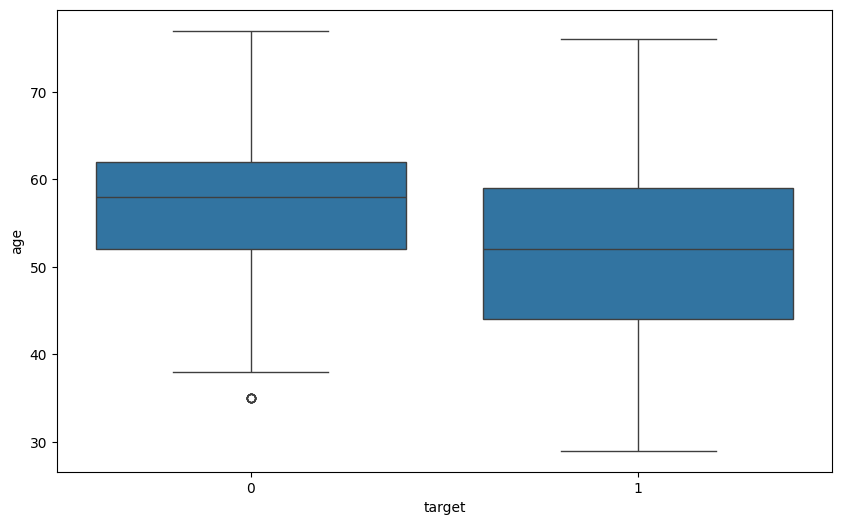

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='target',y='age',data=df)
plt.show()

Insight: mean `age` with `target` 1 have bigger than other, and median `age` with `target` 0 have bigger than other

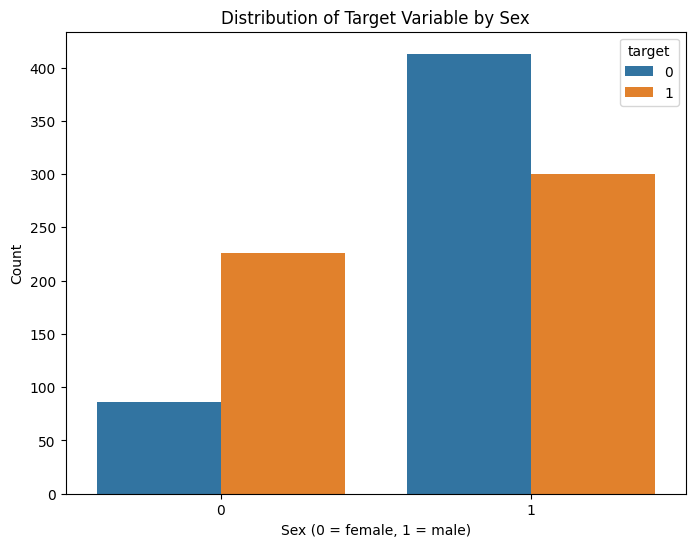

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=df)
plt.title('Distribution of Target Variable by Sex')
plt.xlabel('Sex (0 = female, 1 = male)')
plt.ylabel('Count')
plt.show()

Insight: `sex` male have `target` 1 bigger than other and `sex` male count `target` 0 more than `target` 1

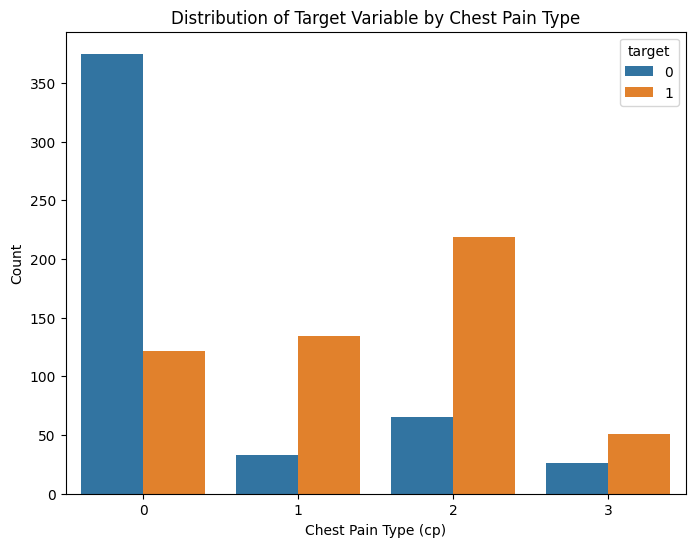

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', hue='target', data=df)
plt.title('Distribution of Target Variable by Chest Pain Type')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Count')
plt.show()

Insight: count `cp` type 2 have `target` 1 bigger than other, and `cp` with type 0 have target 0 bigger than other

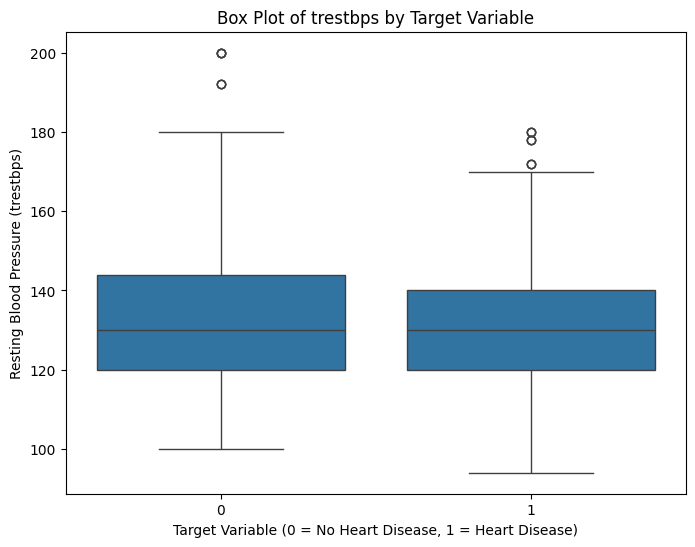

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='trestbps', data=df)
plt.title('Box Plot of trestbps by Target Variable')
plt.xlabel('Target Variable (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('Resting Blood Pressure (trestbps)')
plt.show()


Insight: both `target` have outliers `trstbps`, mean `target` 0 have `trestbps` bigger than other, median `trestbps` almost same for `target` 0 and 1

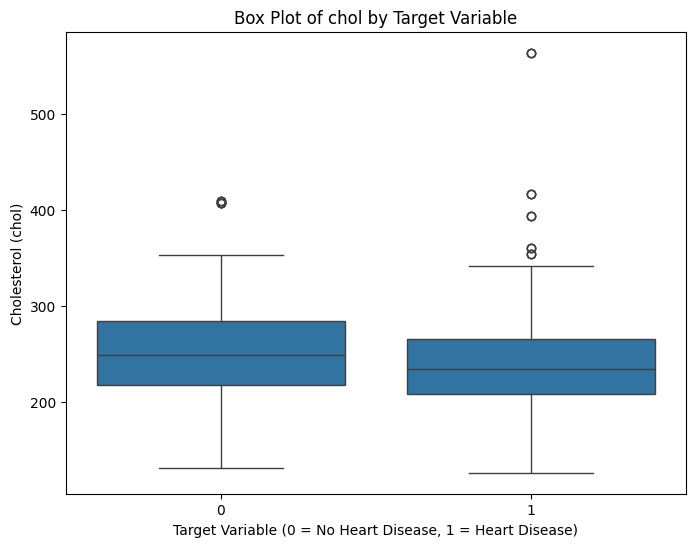

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='chol', data=df)
plt.title('Box Plot of chol by Target Variable')
plt.xlabel('Target Variable (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('Cholesterol (chol)')
plt.show()

Insight: all `target` have outliers for `chol`, mean and median `chol` with target 0 have bigger than other

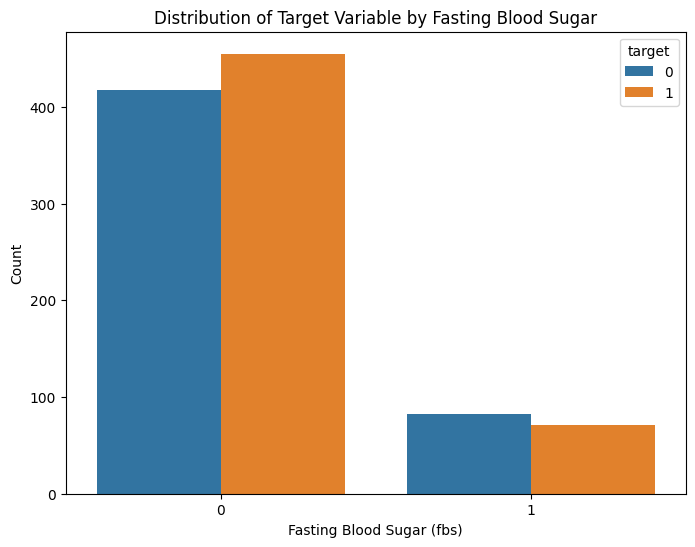

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fbs', hue='target', data=df)
plt.title('Distribution of Target Variable by Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar (fbs)')
plt.ylabel('Count')
plt.show()

Insight: count `fbs` with target 0 have more bigger than other

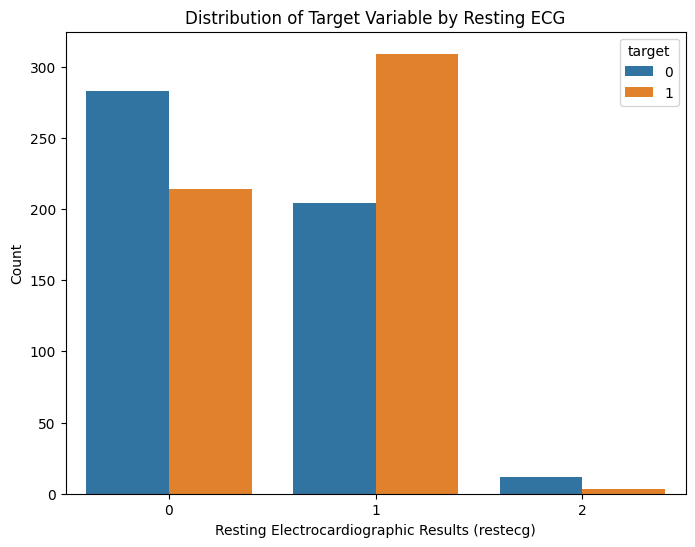

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='restecg', hue='target', data=df)
plt.title('Distribution of Target Variable by Resting ECG')
plt.xlabel('Resting Electrocardiographic Results (restecg)')
plt.ylabel('Count')
plt.show()

Insight: count `restecg` with type 1 have `target` 1 bigger than other

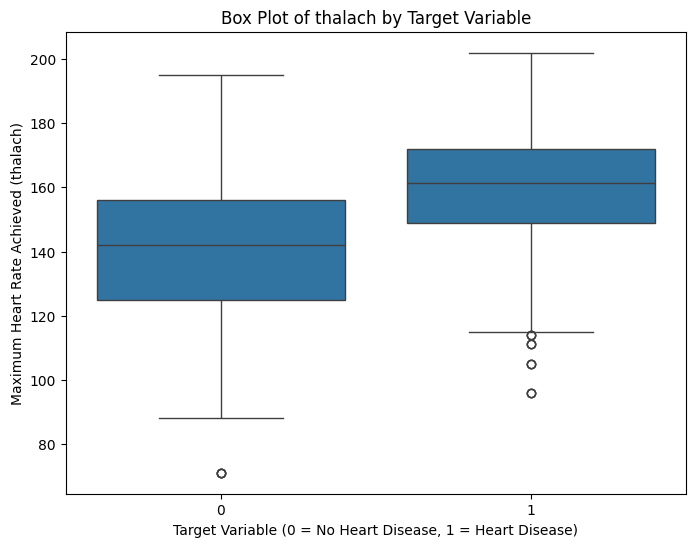

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='thalach', data=df)
plt.title('Box Plot of thalach by Target Variable')
plt.xlabel('Target Variable (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('Maximum Heart Rate Achieved (thalach)')
plt.show()

Insight: `thalach` for all `target` have outliers, `thalac` with `target` 0 have mean bigger than other, `thalac` with `target` 1 have median bigger than other

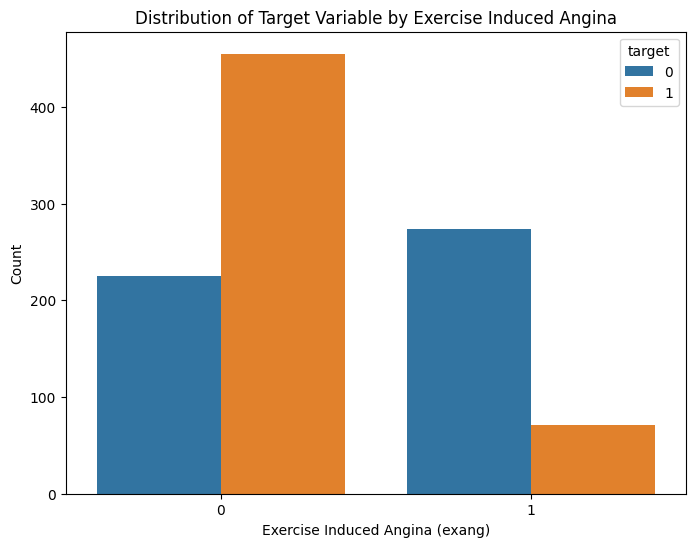

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='exang', hue='target', data=df)
plt.title('Distribution of Target Variable by Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina (exang)')
plt.ylabel('Count')
plt.show()

Insight: count `exang` with `target` 0 have bigger than other

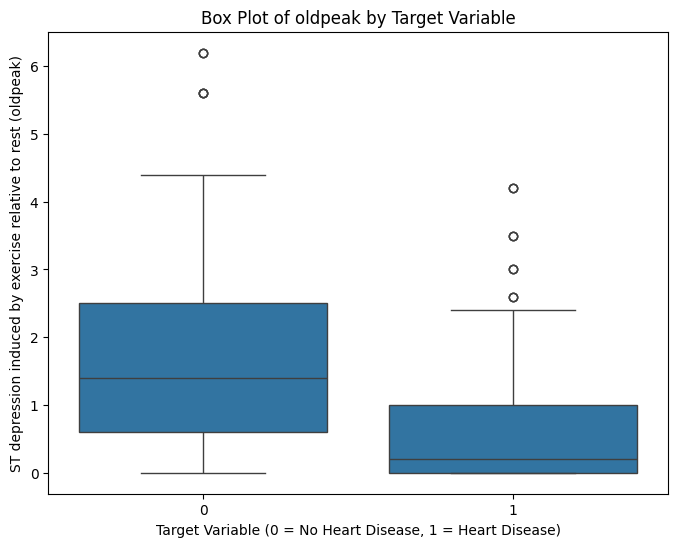

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='oldpeak', data=df)
plt.title('Box Plot of oldpeak by Target Variable')
plt.xlabel('Target Variable (0 = No Heart Disease, 1 = Heart Disease)')
plt.ylabel('ST depression induced by exercise relative to rest (oldpeak)')
plt.show()

Insight: `oldpeak` for both `target` have outliers, `target` 0 have mean and median `oldpeak` bigger than other

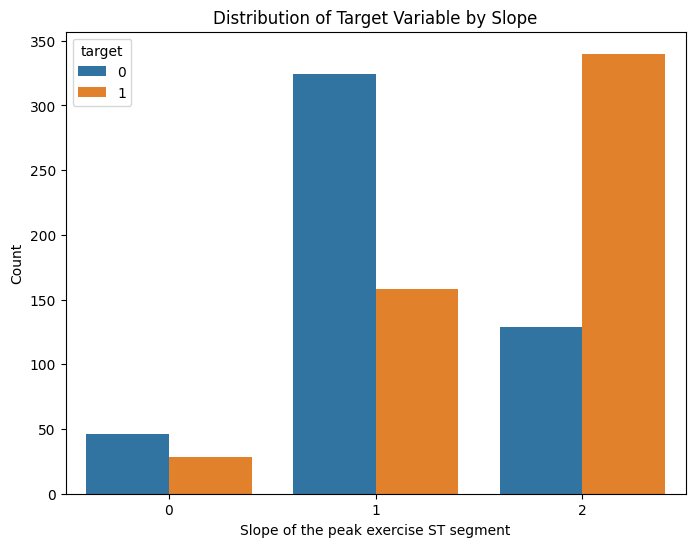

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='slope', hue='target', data=df)
plt.title('Distribution of Target Variable by Slope')
plt.xlabel('Slope of the peak exercise ST segment')
plt.ylabel('Count')
plt.show()

Insight: count `slope` with target 1 have bigger than other

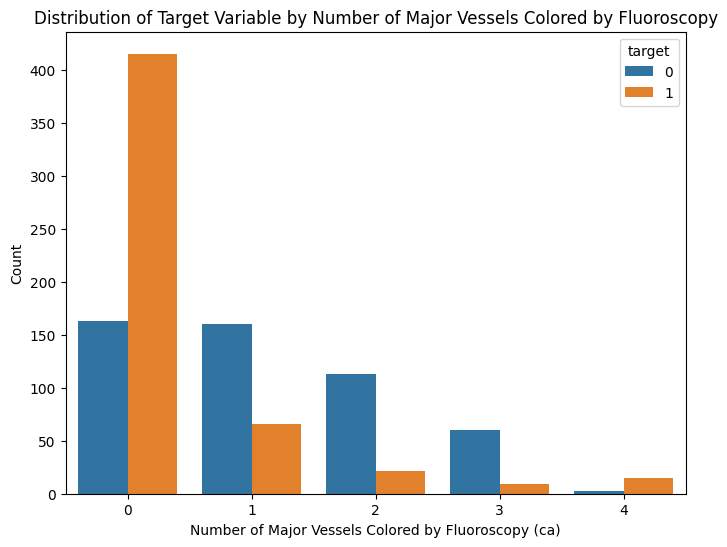

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ca', hue='target', data=df)
plt.title('Distribution of Target Variable by Number of Major Vessels Colored by Fluoroscopy')
plt.xlabel('Number of Major Vessels Colored by Fluoroscopy (ca)')
plt.ylabel('Count')
plt.show()

Insight: count `ca` with type 0 have `target` 1 bigger than others

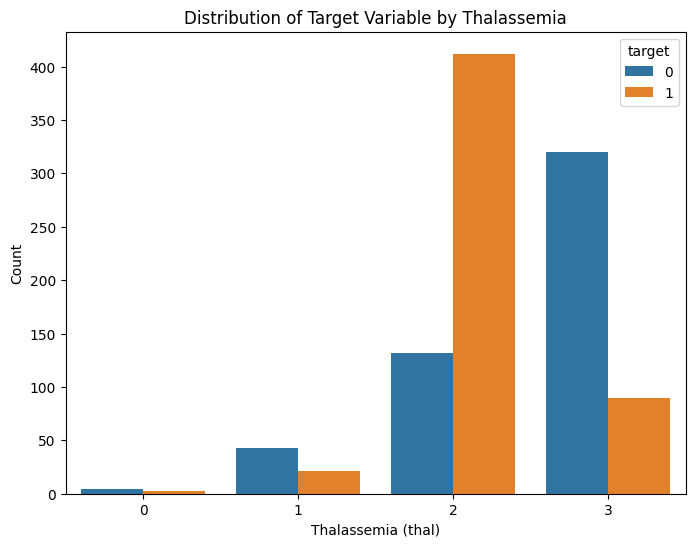

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='thal', hue='target', data=df)
plt.title('Distribution of Target Variable by Thalassemia')
plt.xlabel('Thalassemia (thal)')
plt.ylabel('Count')
plt.show()

Insight: count `thal` with type 2 have `target` 1 bigger than other

**Preparation Data**

Clean, well-structured data is key to building effective models. In this step, we handle missing values. This meticulous preparation ensures the dataset is ready for accurate and reliable machine learning predictions

In [8]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


From above code, no have missing values

In [9]:
x = df.drop(['target'], axis=1)
y = df['target']

**K-Fold Cross Validation**

K-Fold Cross-Validation splits the dataset into multiple folds, training the model on different subsets and testing on unseen data. This technique minimizes overfitting and provides a comprehensive evaluation of model performance. By leveraging Python’s scikit-learn, we ensure that our model is both robust and generalizes well to new data

In [10]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, test_idx in kf.split(x):
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

**Modeling**

In this phase, we develop and fine-tune machine learning models using powerful algorithms like XGBoost, LightGBM, and Randomforest. With Python’s scikit-learn and other ML libraries, we train models, and evaluate their performance. The goal: a model that balances accuracy, precision, and recall to deliver actionable insights

**XGBoost**

XGBoost (Extreme Gradient Boosting) Classifier is a powerful and efficient machine learning algorithm designed for classification tasks. It is based on the gradient boosting framework and utilizes decision trees as its base learners. XGBoost is highly regarded for its scalability, speed, and performance, making it a popular choice for both structured and unstructured data problems.

The algorithm operates by building a series of decision trees, where each tree tries to correct the errors made by the previous ones. The trees are constructed sequentially, and the algorithm minimizes the loss function using gradient descent

In [11]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)

xgb_pred = xgb_model.predict(x_test)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy:", xgb_accuracy)

XGBoost Accuracy: 1.0


     Feature  Importance
2         cp    0.281682
12      thal    0.193002
11        ca    0.136766
8      exang    0.072072
1        sex    0.071582
9    oldpeak    0.044025
0        age    0.041881
10     slope    0.037536
7    thalach    0.029205
6    restecg    0.028794
4       chol    0.028029
3   trestbps    0.024635
5        fbs    0.010790


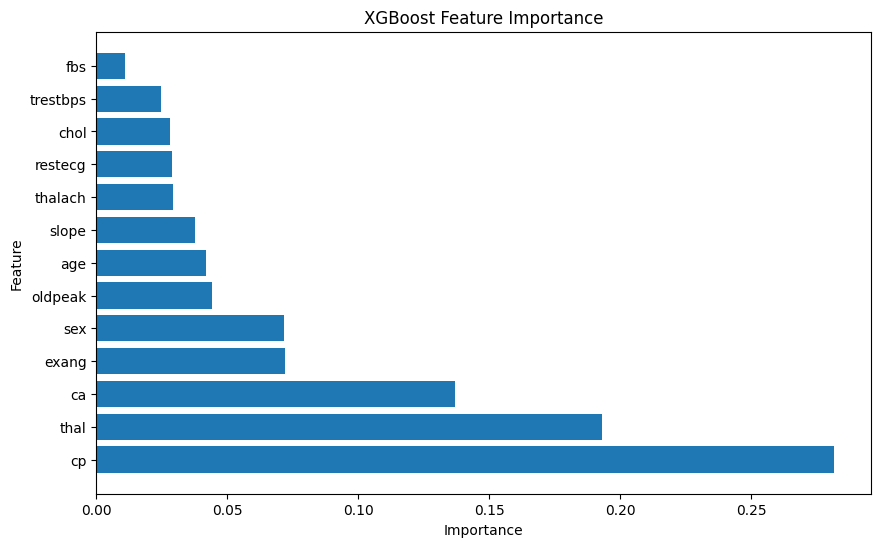

In [12]:
importances = xgb_model.feature_importances_
feature_names = x.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()

Insight: `cp` have higher importance than other and `fbs` less than importance than other

**LightGBM**

LightGBM (Light Gradient Boosting Machine) is a high-performance gradient boosting framework specifically designed for speed and efficiency in machine learning tasks. Developed by Microsoft, LightGBM is optimized for large-scale datasets and high-dimensional data, making it a popular choice for both classification and regression problems.

LightGBM uses decision trees as base learners and applies a boosting approach to iteratively improve model performance. It introduces several innovations to enhance computational speed and memory efficiency without compromising accuracy

In [13]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(x_train, y_train)
lgb_pred = lgb_model.predict(x_test)
lgb_accuracy = accuracy_score(y_test, lgb_pred)
print("LightGBM Accuracy:", lgb_accuracy)

[LightGBM] [Info] Number of positive: 420, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 820, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512195 -> initscore=0.048790
[LightGBM] [Info] Start training from score 0.048790
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

     Feature  Importance
4       chol         521
7    thalach         447
0        age         446
3   trestbps         329
9    oldpeak         319
2         cp         213
11        ca         177
12      thal         142
1        sex         107
6    restecg          85
10     slope          81
8      exang          79
5        fbs          26


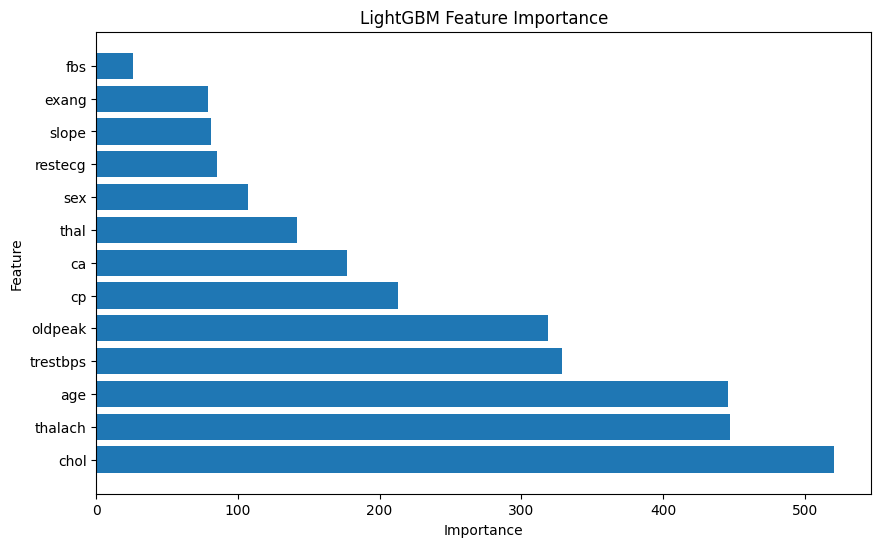

In [14]:
importances = lgb_model.feature_importances_
feature_names = x.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('LightGBM Feature Importance')
plt.show()

Insight: `chol` have importance highest than others, and `fbs` less importance than others

**Random Forest**

Random Forest is a versatile and powerful machine learning algorithm used for both classification and regression tasks. It is an ensemble method that builds multiple decision trees during training and combines their outputs to make predictions. This approach leverages the concept of "wisdom of the crowd," where the collective decision of many models is more robust and accurate than individual predictions

In [15]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("RandomForest Accuracy:", rf_accuracy)

RandomForest Accuracy: 1.0


     Feature  Importance
2         cp    0.281682
12      thal    0.193002
11        ca    0.136766
8      exang    0.072072
1        sex    0.071582
9    oldpeak    0.044025
0        age    0.041881
10     slope    0.037536
7    thalach    0.029205
6    restecg    0.028794
4       chol    0.028029
3   trestbps    0.024635
5        fbs    0.010790


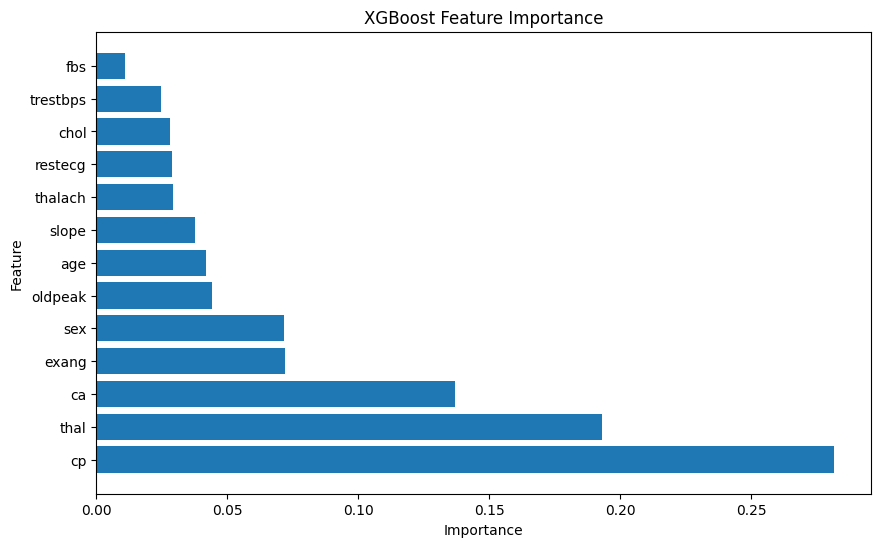

In [16]:
importances = xgb_model.feature_importances_
feature_names = x.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()

Insight: `cp` have importance highest than others, and `fb` have less importance than others

**Evaluation**

Evaluating machine learning models, including XGBoost, LightGBM, and Random Forest, is a critical step in determining their performance and suitability for specific tasks. The choice of evaluation metrics depends on the type of problem being solved (e.g., classification or regression) and the business or research objectives.

In [ ]:
# XGBoost
xgb_cm = confusion_matrix(y_test, xgb_pred)
print("XGBoost Confusion Matrix:\n", xgb_cm)
print(classification_report(y_test, xgb_pred))

# LightGBM
lgb_cm = confusion_matrix(y_test, lgb_pred)
print("\nLightGBM Confusion Matrix:\n", lgb_cm)
print(classification_report(y_test, lgb_pred))

# RandomForest
rf_cm = confusion_matrix(y_test, rf_pred)
print("\nRandomForest Confusion Matrix:\n", rf_cm)
print(classification_report(y_test, rf_pred))

XGBoost Confusion Matrix:
 [[ 99   0]
 [  0 106]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       106

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


LightGBM Confusion Matrix:
 [[ 99   0]
 [  0 106]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       106

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


RandomForest Confusion Matrix:
 [[ 99   0]
 [  0 106]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       106

    accuracy            

Insight: From above model we have result same for all model

**Conclusion**

All model is good for prediction heart disese, the matrix we can choose is `Precission`. This matrix for predict heart disese with true heart disese, if not `Precission` we have trouble if predict no heart disese but actualy is heart disese

**Reference**

1. https://xbe.at/
2. https://scikit-learn.org/stable/supervised_learning.html
3. https://www.analyticsvidhya.com/
4. https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset